In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [4]:
data = pd.read_csv('C:/Users/barte/Desktop/smartphone.csv')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            980 non-null    object 
 1   model                 980 non-null    object 
 2   price                 980 non-null    int64  
 3   rating                878 non-null    float64
 4   has_5g                980 non-null    bool   
 5   has_nfc               980 non-null    bool   
 6   has_ir_blaster        980 non-null    bool   
 7   processor_name        960 non-null    object 
 8   processor_brand       960 non-null    object 
 9   num_cores             973 non-null    object 
 10  processor_speed       937 non-null    float64
 11  battery_capacity      968 non-null    float64
 12  fast_charging         980 non-null    int64  
 13  ram_capacity          980 non-null    float64
 14  internal_memory       978 non-null    float64
 15  refresh_rate          9

In [6]:
data['num_front_cameras'] = pd.to_numeric(data['num_front_cameras'], errors='coerce')
data['primary_camera_rear'] = pd.to_numeric(data['primary_camera_rear'], errors='coerce')
data['primary_camera_front'] = pd.to_numeric(data['primary_camera_front'], errors='coerce')
data['has_5g'] = data['has_5g'].astype(int)
data['has_nfc'] = data['has_nfc'].astype(int)
data['has_ir_blaster'] = data['has_ir_blaster'].astype(int)

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            980 non-null    object 
 1   model                 980 non-null    object 
 2   price                 980 non-null    int64  
 3   rating                878 non-null    float64
 4   has_5g                980 non-null    int32  
 5   has_nfc               980 non-null    int32  
 6   has_ir_blaster        980 non-null    int32  
 7   processor_name        960 non-null    object 
 8   processor_brand       960 non-null    object 
 9   num_cores             973 non-null    object 
 10  processor_speed       937 non-null    float64
 11  battery_capacity      968 non-null    float64
 12  fast_charging         980 non-null    int64  
 13  ram_capacity          980 non-null    float64
 14  internal_memory       978 non-null    float64
 15  refresh_rate          9

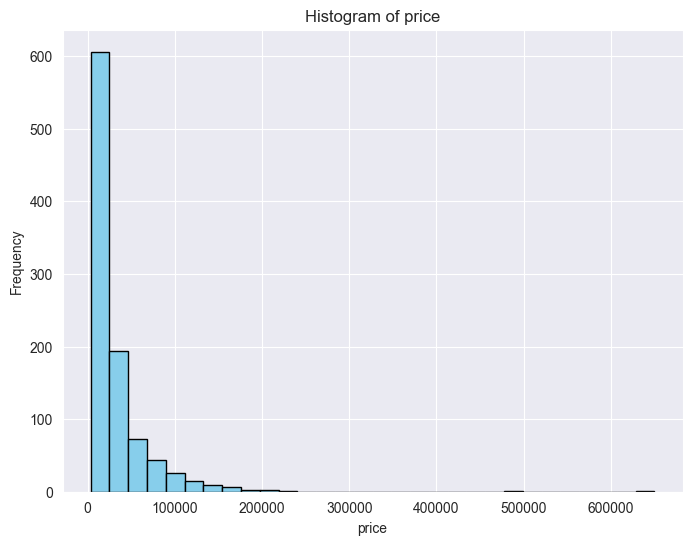

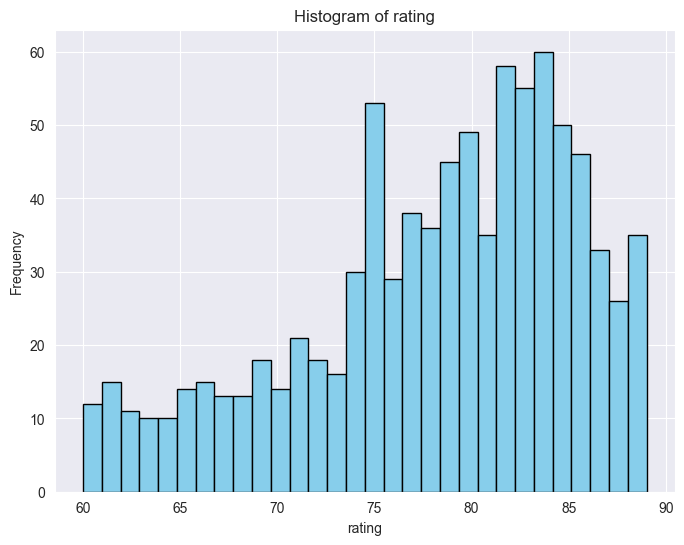

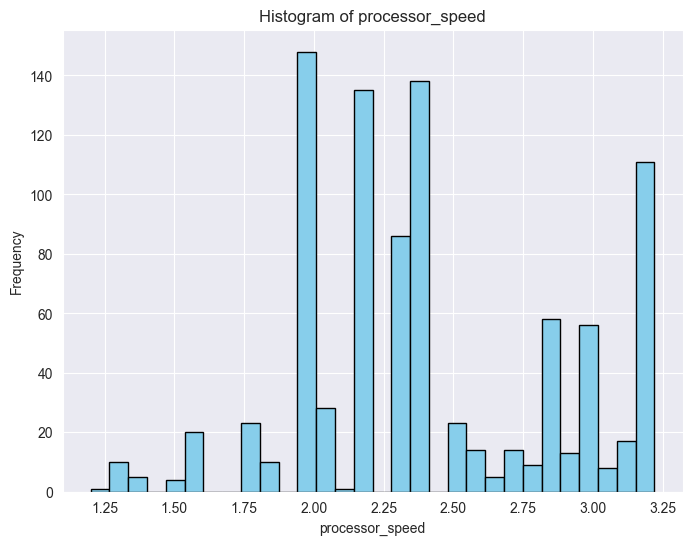

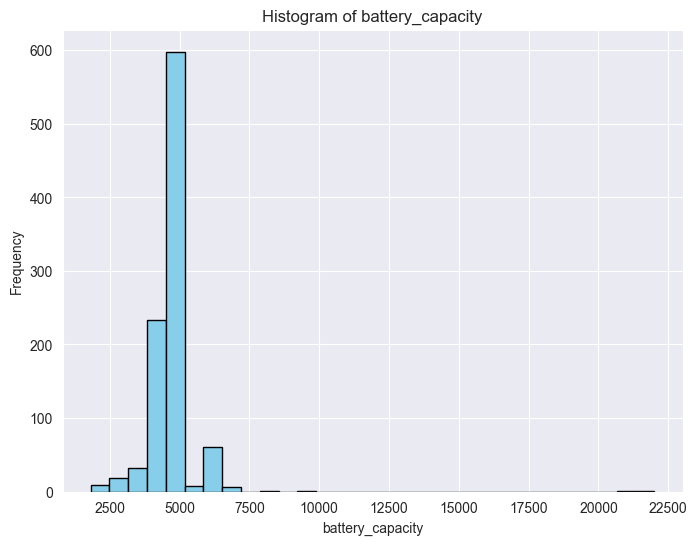

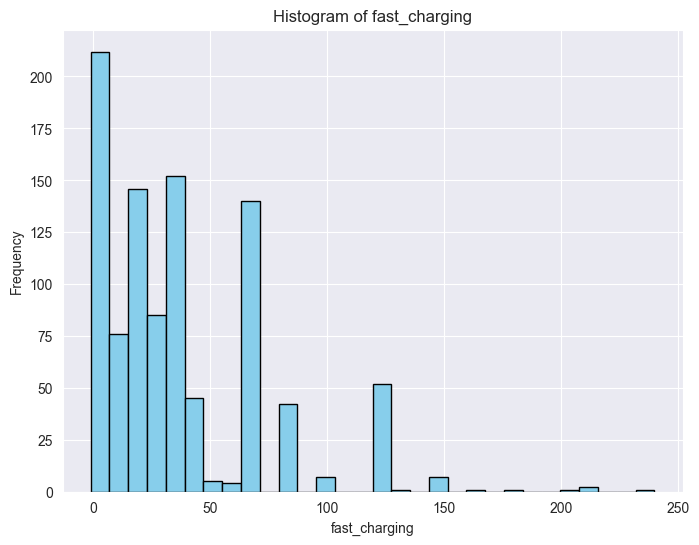

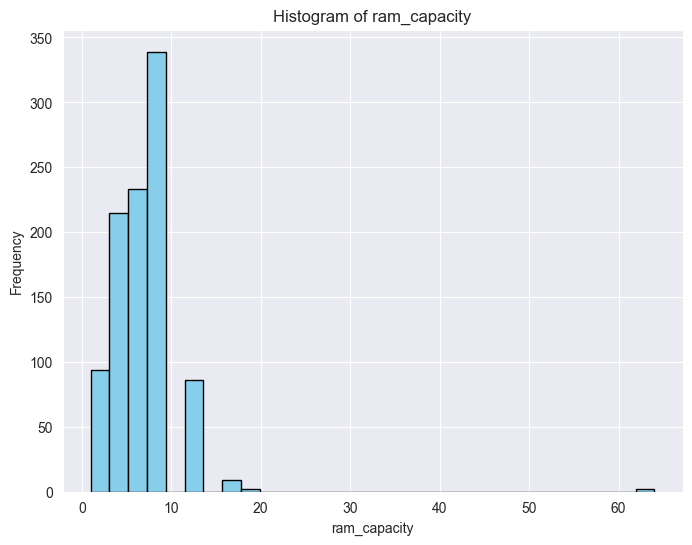

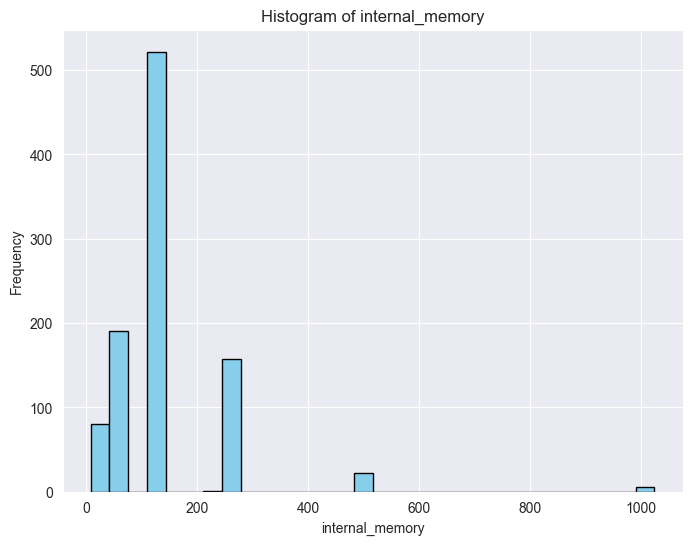

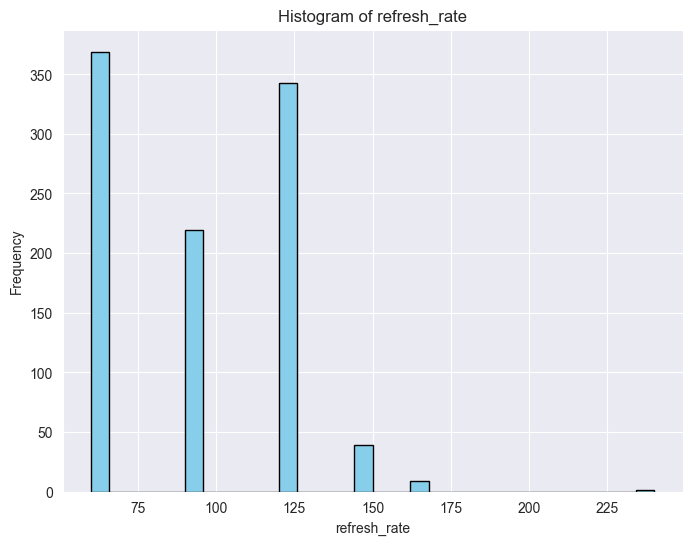

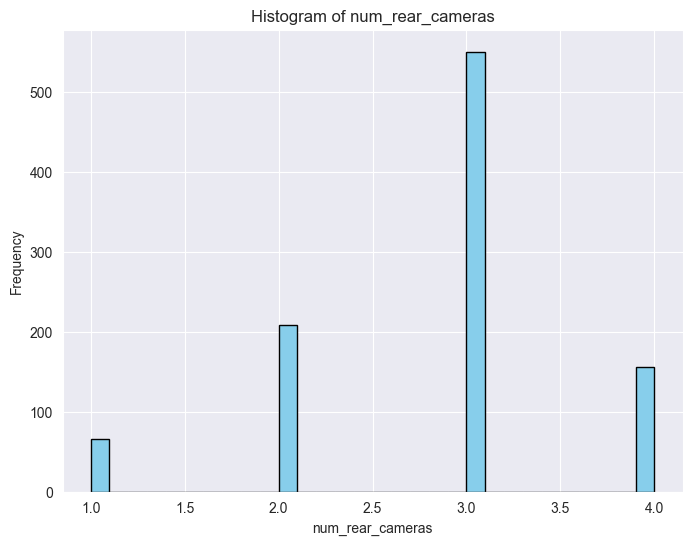

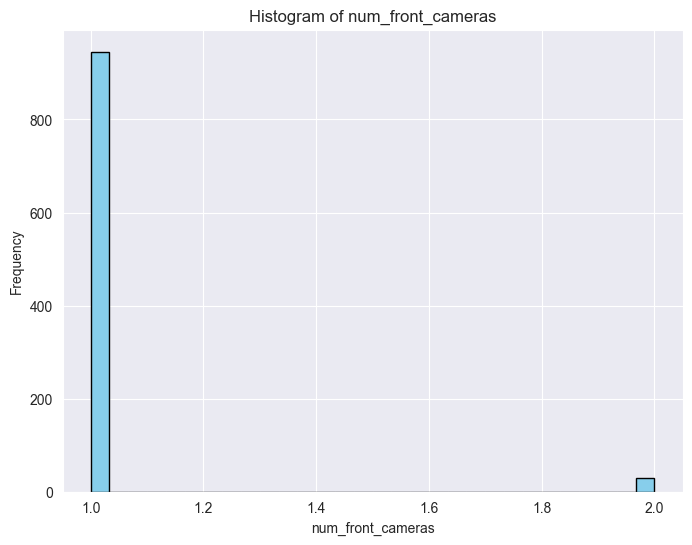

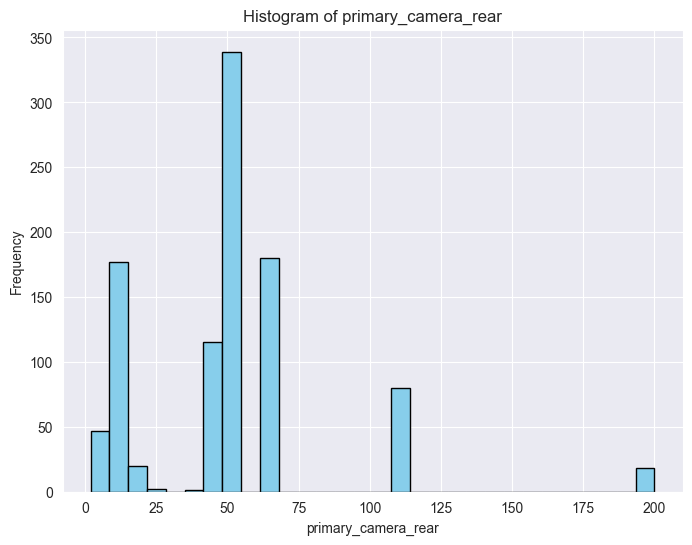

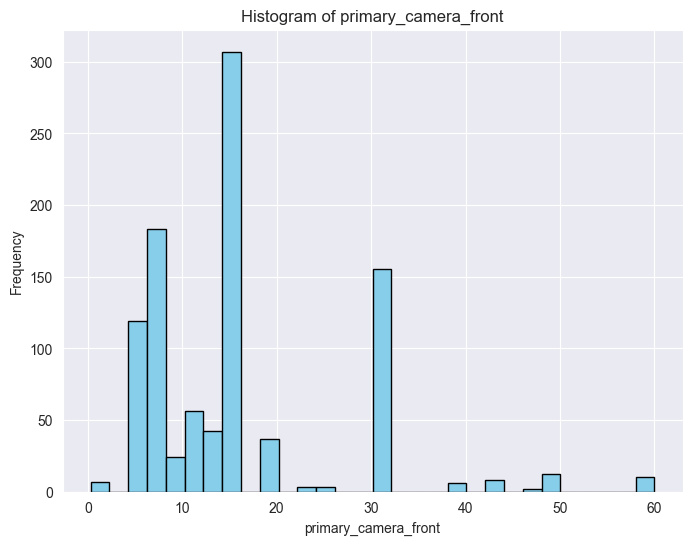

In [8]:
z = data.select_dtypes(include=['int64', 'float64'])
for column in z.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

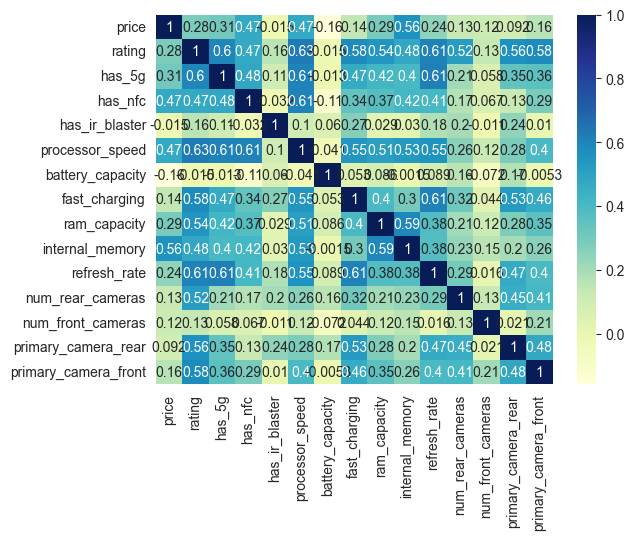

In [9]:
CORREL = data.corr(numeric_only=True)
sns.heatmap(CORREL, cmap="YlGnBu", annot=True, cbar=True)
plt.show()

In [10]:
X = z.drop(columns=['price'])
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [12]:
y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 453855192.168509
R-squared (R2): 0.5277509768829117
